Question 6.
Write a code to implement the following exploratory data analysis: (use dataset A1.csv)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# uploading dataset
from google.colab import files

uploaded = files.upload()

Saving data.csv to data (6).csv


In [70]:
# display head of the data
a1 = pd.read_csv("data.csv")

print(a1.head())

   Sample Number Classes  Feature 1  Feature 2  Feature 3  Feature 4     Sex
0              1       A       39.2       18.6        190       4250    MALE
1              2       B       45.2       13.8        215       4750  FEMALE
2              3       C       51.9       19.5        206       3950    MALE
3              4       A       42.8       18.5        195       4250    MALE
4              5       B       42.6       13.7        213       4950  FEMALE


a. Find the frequency of samples for each class.

In [71]:
# Frequency of samples of each class
class_freq = a1.groupby("Classes")["Classes"].count()

print(class_freq)

Classes
A    151
B    123
C     68
Name: Classes, dtype: int64


b. Generate data description and calculate the interquartile range for all four features.

In [72]:
# data description
print(a1.describe())

       Sample Number   Feature 1   Feature 2   Feature 3    Feature 4
count     342.000000  342.000000  342.000000  342.000000   342.000000
mean      171.500000   43.921930   17.151170  200.915205  4201.754386
std        98.871128    5.459584    1.974793   14.061714   801.954536
min         1.000000   32.100000   13.100000  172.000000  2700.000000
25%        86.250000   39.225000   15.600000  190.000000  3550.000000
50%       171.500000   44.450000   17.300000  197.000000  4050.000000
75%       256.750000   48.500000   18.700000  213.000000  4750.000000
max       342.000000   59.600000   21.500000  231.000000  6300.000000


In [73]:
# IQR
features = ["Feature 1", "Feature 2", "Feature 3", "Feature 4"]
for feature in features:
  Q1 = a1[feature].quantile(0.25)
  Q3 = a1[feature].quantile(0.75)
  IQR = Q3 - Q1
  print(f"Inter quartile range of {feature} is: {IQR}")

Inter quartile range of Feature 1 is: 9.274999999999999
Inter quartile range of Feature 2 is: 3.0999999999999996
Inter quartile range of Feature 3 is: 23.0
Inter quartile range of Feature 4 is: 1200.0


c. Plot a histogram of feature 1 for class A.

In [74]:
# filter class A data only

class_a = a1[a1["Classes"] == "A"]

class_a_f1 = class_a["Feature 1"]

Text(0.5, 0, 'Feature 1 of class A')

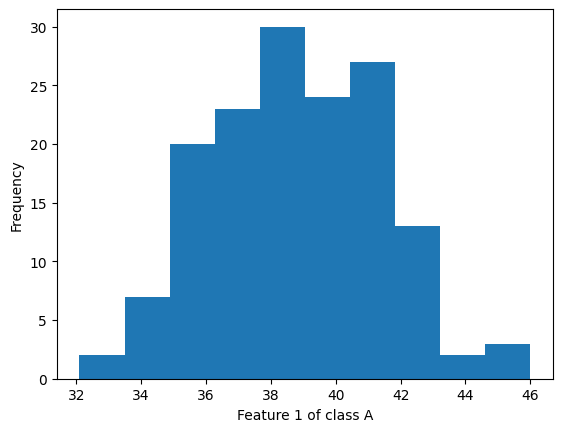

In [75]:
plt.hist(class_a_f1)
plt.ylabel("Frequency")
plt.xlabel("Feature 1 of class A")

d. Make the box plot for feature 2 for each class separately.

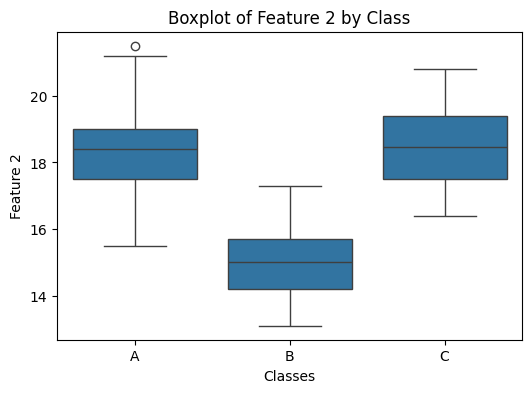

In [76]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Classes', y='Feature 2', data=a1)
plt.title("Boxplot of Feature 2 by Class")
plt.show()

e. Violin plot for feature 3 for each class separately.

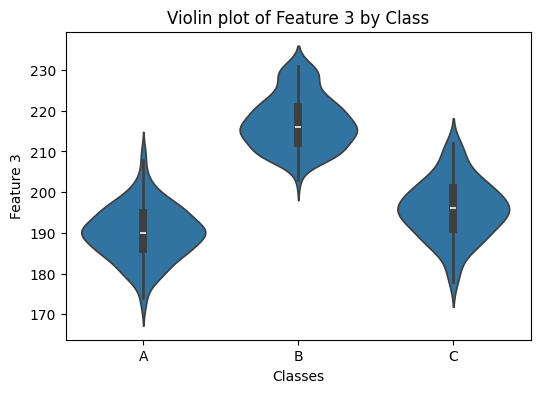

In [77]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='Classes', y='Feature 3', data=a1)
plt.title("Violin plot of Feature 3 by Class")
plt.show()

f. Scatter plots between feature 1 and feature 3 showing classes separately.

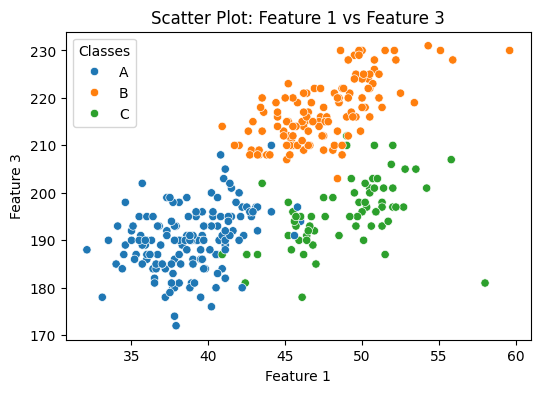

In [78]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature 1', y='Feature 3', hue='Classes', data=a1)
plt.title("Scatter Plot: Feature 1 vs Feature 3")
plt.show()

g. Contour plot between feature 1 and feature 4 showing classes separately.

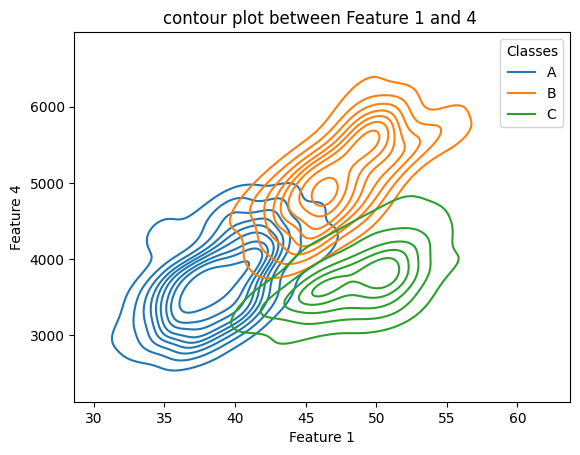

In [79]:
sns.kdeplot(x = "Feature 1", y = "Feature 4", hue = "Classes", data = a1)
plt.title(f"contour plot between Feature 1 and 4 ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 4")
plt.show()

h. Hexagonal bin plot for class A between feature 2 and 4.

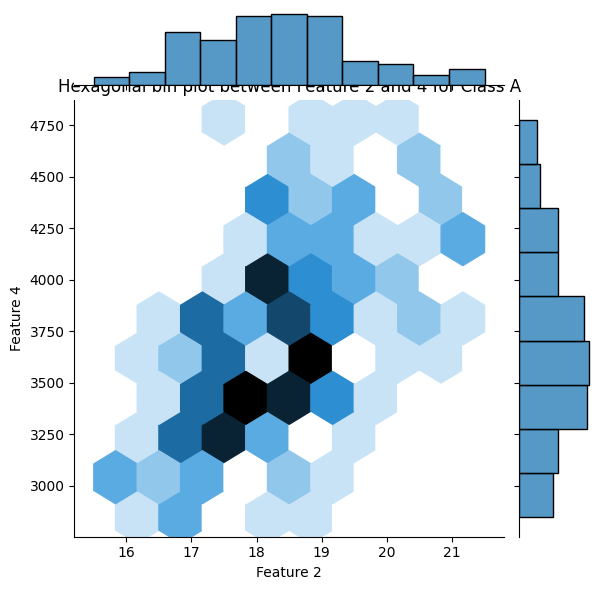

In [80]:
class_data = a1[a1["Classes"] == "A"]
sns.jointplot(x = "Feature 2", y = "Feature 4", data = class_data, kind = "hex")
plt.title("Hexagonal bin plot between Feature 2 and 4 for Class A")
plt.xlabel("Feature 2")
plt.ylabel("Feature 4")
plt.show()

i. Correlation matrix for the four features.

In [81]:
features = ["Feature 1", "Feature 2", "Feature 3", "Feature 4"]
correlation_mat = a1[features].corr()
print(correlation_mat)

           Feature 1  Feature 2  Feature 3  Feature 4
Feature 1   1.000000  -0.235053   0.656181   0.595110
Feature 2  -0.235053   1.000000  -0.583851  -0.471916
Feature 3   0.656181  -0.583851   1.000000   0.871202
Feature 4   0.595110  -0.471916   0.871202   1.000000


j. Pair plot for the four features showing classes separately.

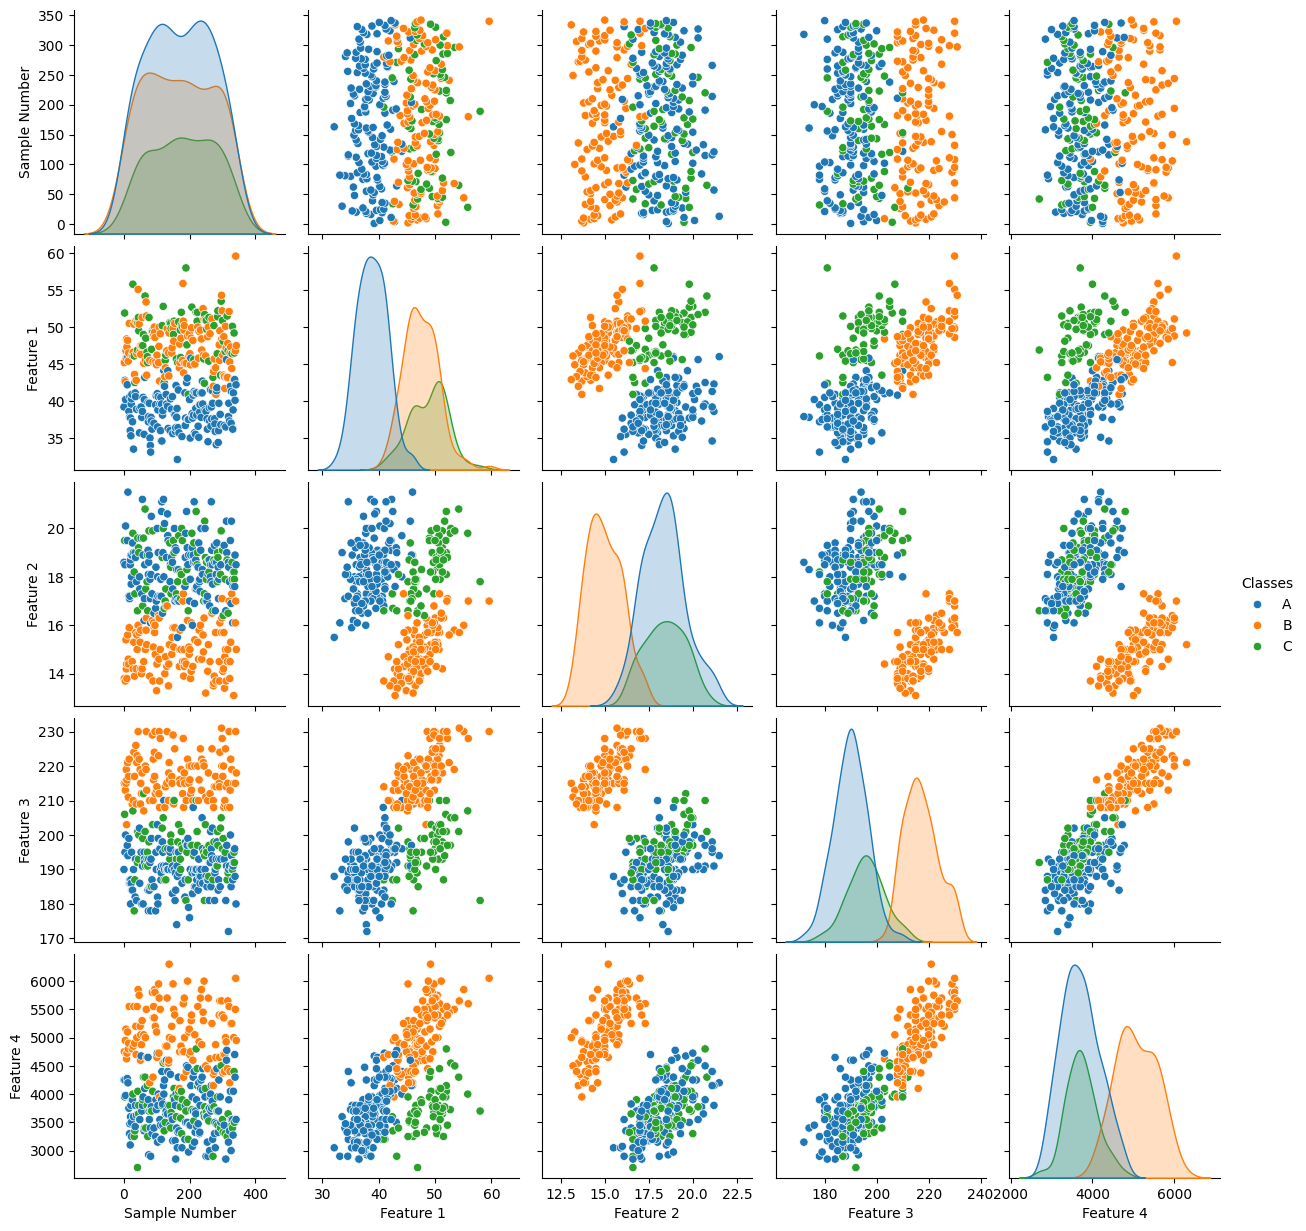

In [82]:
sns.pairplot(a1, hue = "Classes")
plt.show()